# CryptoBIT project ->module: historic projection
----------------------------------------------
### the main workbook accompanying the DASH-board about "MST'-graph depicting CryptoMarket

* **INFO:** data spurce: www.kaggle.com/philmohun/cryptocurrency-financial-data -prepered in advance
* **CONCEPT:** 1Year visual-projection of **MSTgraph** i.e.: **'2017-02-01':'2018-02-01' simulation window**

* **THESIS:**  * **+/-ε** "Potential of **"Miniaml Spanning Tree"** graph in **CryptoMarket Crashes Preditions**" *
* **further:** review of correlation.matrix to euclidean.distance transformation for proper MST.graph projection..

In [1]:
from datetime import date
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

In [3]:
from IPython.display import display
import ipywidgets as widgets

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import offline
offline.init_notebook_mode()

In [5]:
historic_df = pd.read_csv('crypto_history_top50', header=0, index_col=0, parse_dates=True)
historic_df = historic_df.sort_index()
historic_df.tail(3)

bitcoin  ethereum   ripple  bitcoin-cash   cardano   stellar  \
Date                                                                        
2018-01-30  10106.30   1071.13  1.14000       1470.55  0.531913  0.489648   
2018-01-31  10221.10   1118.31  1.16000       1486.89  0.519315  0.539797   
2018-02-01   9170.54   1036.79  0.96253       1274.35  0.421672  0.456455   

               neo  litecoin    eos       nem      ...        kucoin-shares  \
Date                                               ...                        
2018-01-30  146.28    165.28  11.56  0.776491      ...                 7.93   
2018-01-31  145.76    163.35  12.20  0.779857      ...                 8.02   
2018-02-01  126.00    142.30  10.21  0.618265      ...                 7.22   

            rchain  aeternity  dogecoin  decred  komodo  hshare    gas   ark  \
Date                                                                           
2018-01-30    1.95       2.46  0.006024   89.28    6.04   14.61  60.58  5.47   
2018-01-31    2.03       2.95  0.006010   97.83    5.92   14.09  57.40  5.68   
2018-02-01    1.87       2.70  0.005029   83.38    4.94   11.90  50.99  4.82   

            kyber-network  
Date                       
2018-01-30           3.60  
2018-01-31           4.11  
2018-02-01           3.54  

[3 rows x 50 columns]

#### step_e01: crypto.coins selection ->condition: continuity of quotations in given time-horizon '2016-10-31' - '2018-02-01'
--------------

In [6]:
delta = (date(2018, 2, 1) - date(2016, 10, 31)).days
historic_df = historic_df.loc[:, historic_df.notna().sum() >= delta]
bitcoins_df = historic_df['bitcoin'].tail(366)  # for tseries_graph
historic_df.head(100).tail(50)

bitcoin  ethereum    ripple   stellar       neo  litecoin  \
Date                                                                    
2016-12-20   800.88      7.66  0.006500  0.002836  0.120868      3.66   
2016-12-21   834.28      7.91  0.006445  0.002810  0.167117      3.65   
2016-12-22   864.54      7.58  0.006363  0.002751  0.155065      3.71   
2016-12-23   921.98      7.17  0.006286  0.002646  0.137593      4.66   
2016-12-24   898.82      7.27  0.006349  0.002691  0.146916      4.55   
2016-12-25   896.18      7.18  0.006444  0.002578  0.146788      4.35   
2016-12-26   907.61      7.27  0.006326  0.002657  0.166597      4.36   
2016-12-27   933.20      7.17  0.006199  0.002543  0.158032      4.47   
2016-12-28   975.92      7.52  0.006173  0.002509  0.150689      4.57   
2016-12-29   973.50      8.28  0.006341  0.002559  0.140950      4.56   
2016-12-30   961.24      8.16  0.006426  0.002544  0.147527      4.39   
2016-12-31   963.74      7.97  0.006449  0.002469  0.144763      4.33   
2017-01-01   998.33      8.17  0.006368  0.002481  0.141841      4.51   
2017-01-02  1021.75      8.38  0.006311  0.002477  0.145642      4.65   
2017-01-03  1043.84      9.73  0.006386  0.002554  0.140422      4.63   
2017-01-04  1154.73     11.25  0.006570  0.002735  0.136734      4.84   
2017-01-05  1013.38     10.25  0.006201  0.002598  0.131070      4.29   
2017-01-06   902.20     10.25  0.006315  0.002494  0.135472      3.86   
2017-01-07   908.59      9.87  0.006366  0.002396  0.131104      3.96   
2017-01-08   911.20     10.29  0.006233  0.002355  0.132609      3.99   
2017-01-09   902.83     10.33  0.006167  0.002347  0.123767      4.30   
2017-01-10   907.68     10.55  0.006698  0.002355  0.133864      4.59   
2017-01-11   777.76      9.72  0.006411  0.002089  0.115138      3.85   
2017-01-12   804.83      9.86  0.006423  0.002475  0.124122      3.96   
2017-01-13   823.98      9.77  0.006596  0.002398  0.121321      3.89   
2017-01-14   818.41      9.65  0.006863  0.002472  0.122939      3.90   
2017-01-15   821.80      9.90  0.006726  0.002441  0.123732      3.93   
2017-01-16   831.53      9.64  0.006788  0.002380  0.119649      3.90   
2017-01-17   907.94     10.30  0.006800  0.002545  0.116638      3.94   
2017-01-18   886.62     10.23  0.006709  0.002481  0.123035      3.84   
2017-01-19   899.07     10.40  0.007034  0.002349  0.116619      3.86   
2017-01-20   895.03     10.60  0.006675  0.002357  0.117809      3.89   
2017-01-21   921.79     10.91  0.006706  0.002301  0.116309      3.90   
2017-01-22   924.67     10.70  0.006713  0.002336  0.114313      3.84   
2017-01-23   921.01     10.82  0.006697  0.002332  0.129948      3.84   
2017-01-24   892.69     10.63  0.006540  0.002234  0.120213      3.79   
2017-01-25   901.54     10.57  0.006513  0.002157  0.124216      3.71   
2017-01-26   917.59     10.59  0.006690  0.002197  0.133612      3.83   
2017-01-27   919.75     10.54  0.006415  0.002196  0.130343      3.86   
2017-01-28   921.59     10.56  0.006342  0.002192  0.134674      3.85   
2017-01-29   919.50     10.48  0.006402  0.002225  0.141204      3.85   
2017-01-30   920.38     10.57  0.006381  0.002458  0.153760      4.02   
2017-01-31   970.40     10.73  0.006314  0.002371  0.147016      4.08   
2017-02-01   989.02     10.73  0.006540  0.002357  0.147218      4.08   
2017-02-02  1011.80     10.82  0.006469  0.002420  0.145699      4.09   
2017-02-03  1029.91     11.11  0.006474  0.002399  0.134264      4.08   
2017-02-04  1042.90     11.43  0.006492  0.002391  0.135867      4.06   
2017-02-05  1027.34     11.35  0.006442  0.002344  0.131582      4.04   
2017-02-06  1038.15     11.39  0.006450  0.002369  0.126788      4.04   
2017-02-07  1061.35     11.52  0.006407  0.002319  0.133135      4.04   

                 nem   dash  monero      lisk    ...      stratis  bitshares  \
Date                                             ...                           
2016-12-20  0.003731  10.22    8.43  0.147727    ...   

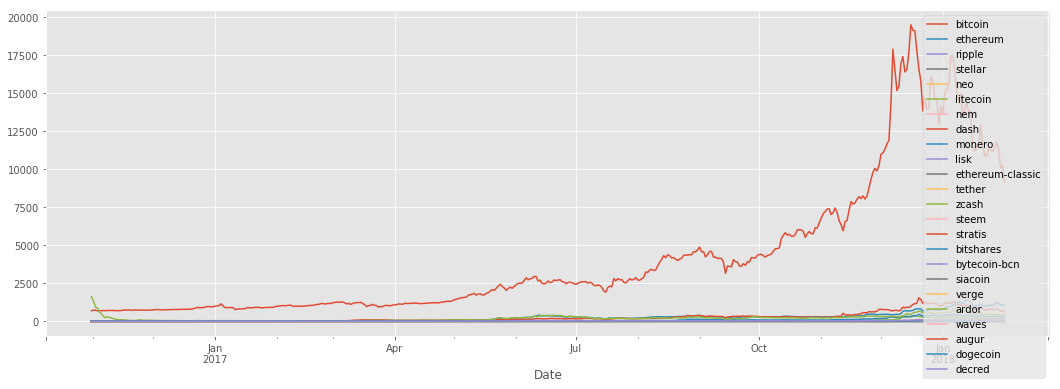

In [7]:
historic_df.plot(figsize=(18, 6));

#### step_e02: time-series stationarization via log-returns calculation ->in consequence '2016-11-01'-'2018-02-01' of rate-returns
------------

In [8]:
historic_df = np.log( (historic_df / historic_df.shift(1)).dropna() )    # 'tether'-coin case..

In [9]:
historic_df.tail(1)

bitcoin  ethereum   ripple   stellar      neo  litecoin  \
Date                                                                   
2018-02-01 -0.108458 -0.075689 -0.18661 -0.167703 -0.14568 -0.137958   

                 nem      dash    monero     lisk    ...      stratis  \
Date                                                 ...                
2018-02-01 -0.232193 -0.122511 -0.124396 -0.16471    ...    -0.191312   

            bitshares  bytecoin-bcn   siacoin     verge     ardor  waves  \
Date                                                                       
2018-02-01  -0.119232     -0.154657 -0.187614 -0.184401 -0.277187 -0.141   

             augur  dogecoin    decred  
Date                                    
2018-02-01 -0.0498 -0.178204 -0.159823  

[1 rows x 24 columns]

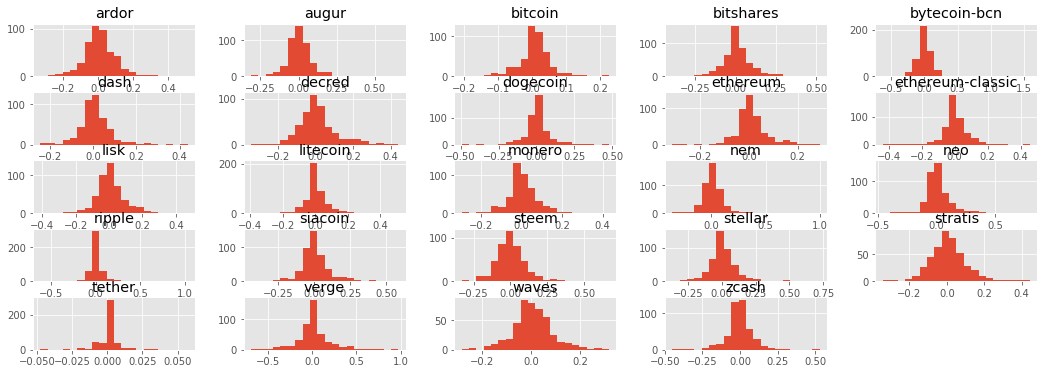

In [10]:
historic_df.hist(figsize=(18, 6), bins=20);

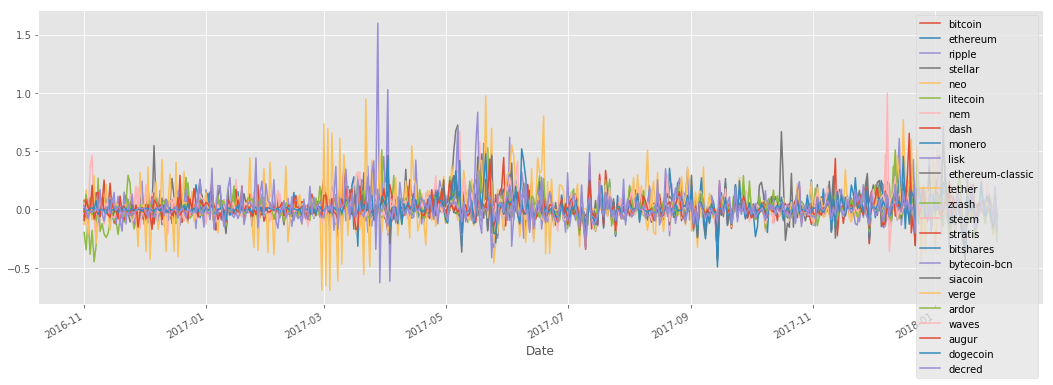

In [11]:
historic_df.plot(figsize=(18, 6));

In [13]:
@widgets.interact(delete=False)              # problematic case of 'theter' -lack of correlation with other coins
def case_tether(delete=False):               #   -> distracpted structure of MSTgraph: 'tether' still attention ;D
    if delete:                               #   -> tether protected by USD parity?
        historic_df.drop(['tether'], axis=1, inplace=True)
    
historic_df.columns

interactive(children=(Checkbox(value=False, description='delete'), Output()), _dom_classes=('widget-interact',…

Index(['bitcoin', 'ethereum', 'ripple', 'stellar', 'neo', 'litecoin', 'nem',
       'dash', 'monero', 'lisk', 'ethereum-classic', 'zcash', 'steem',
       'stratis', 'bitshares', 'bytecoin-bcn', 'siacoin', 'verge', 'ardor',
       'waves', 'augur', 'dogecoin', 'decred'],
      dtype='object')

#### step_e03: example of return.rates correlation.matrix transformation to euklidean.distance ->essence of MSTgraph construction mechanism
------------

In [14]:
# demonstrative MSTgraph construction based 1year-wide corr-matrix of crypto-returns
example_df = historic_df.loc['20170201':'20180201']

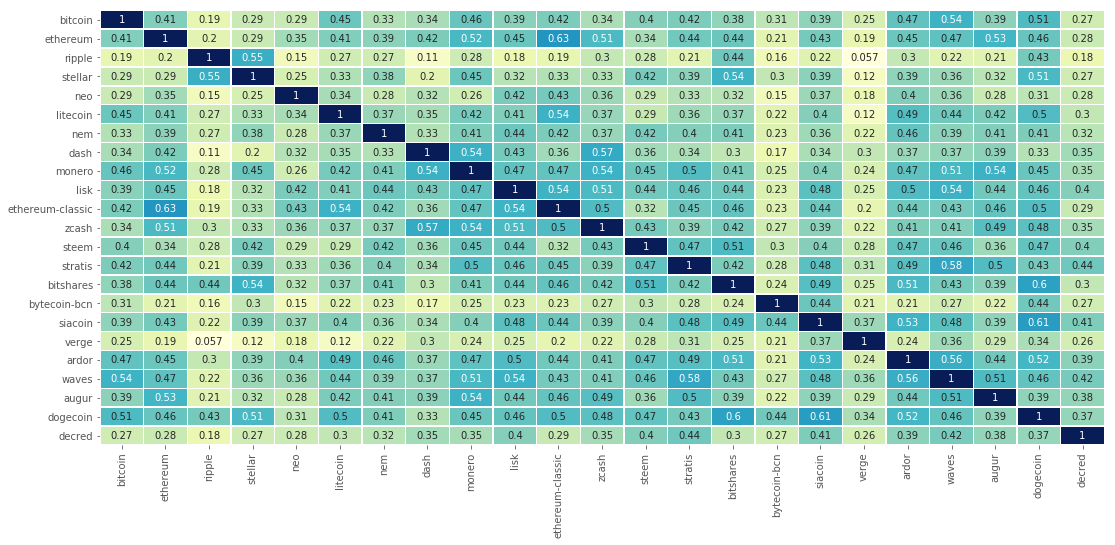

In [15]:
fig, ax = plt.subplots(figsize=(18, 8)) 
sns.heatmap(example_df.corr(), annot=True, cbar=False, linewidths=.5, cmap="YlGnBu", ax=ax)

In [16]:
corr_matrix = example_df.corr().stack().reset_index()
corr_matrix.columns = ['coin1', 'coin2', 'weight']
graph_matrice = corr_matrix.loc[(corr_matrix['coin1'] != corr_matrix['coin2'])] 

In [17]:
graph_TS = nx.from_pandas_edgelist(graph_matrice, 'coin1', 'coin2', ['weight'])
graph_MST = nx.minimum_spanning_tree(graph_TS) 

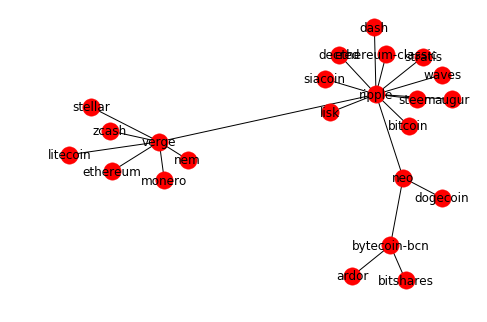

In [18]:
nx.draw(graph_MST, with_labels=True, figsize=(20, 10))

#### step_e04: defining rolling-correlation to Xday-period ->animation data.supply constant in range '2017-02-01':'2018-02-01'
------------

In [19]:
slider = widgets.IntSlider(min=10, max=92,step=1, value=45)
display(slider)            # 10-92 days range for rolling-correlation scope

IntSlider(value=45, max=92, min=10)

In [20]:
rolling_corr = slider.value                         # day-unit: rolling-correlation window for MSTgraph construction      
# historic_df = historic_df.tail(366 + rolling_corr)

interval = 30                                       # day-unit: interval -animation seqenece-step (366 days range)
windows = list(range(366))[::interval]
windows

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]

#### step_e05: main mechanism: loop for MST-parametes collection in moving window 1day per.step 
###### ** *+data aggregation for whole animation routine:  info seperately fo nodes, edges and iterated steps for sequence of plots constructions* **
##### moving correlation.matrix transformed in MSTgraphs edges weighted-structere (where nodes are preselected crypto.coins) for every window-frame
------------

In [21]:
edge_trace_all = []
node_trace_all = []
step_counters = []

for window in windows:
    looper_df = historic_df.iloc[ window:(rolling_corr + window) ]  
    
    # custom corr-matrix estimation (diagonal disposal)
    corr_matrix = looper_df.corr().stack().reset_index()
    corr_matrix.columns = ['coin1', 'coin2','weight']
    graph_matrice = corr_matrix.loc[ corr_matrix['coin1'] != corr_matrix['coin2'] ] 
        
    # package 'networkx': standard graph construction based of corr-matrix (distance)
    # ->then transmutation to MST -structure with smallest possible sum of weighted-edges
    graph_TS = nx.from_pandas_edgelist(graph_matrice, 'coin1', 'coin2', ['weight'])
    graph_MST = nx.minimum_spanning_tree(graph_TS) 
        
    # graph-nedes coordinates estimiation: callibration bitcoin-coin central position
    fix_posit = {'bitcoin': (0,0)}
    fix_nodes = fix_posit.keys()
    positions = nx.spring_layout(
        graph_MST, weight='weight', pos=fix_posit, fixed=fix_nodes, scale=2, center=(0,0))
    
    # base centrality-metrix calculation: general betweeness & distance to bitcoin
    bitcenter = nx.single_source_shortest_path_length(graph_MST, 'bitcoin')
    betweenness = nx.betweenness_centrality(graph_MST)
    
    # package 'plotly': edge traces-contruction
    edge_trace = go.Scatter(
        x = [],
        y = [],
        line = dict(width=1.5, color='#888'), 
        opacity = 0.3,
        hoverinfo = 'none',
        name = window,
        mode = 'lines')
    
    # plot parametrization -position of edges coordinates
    for edge1, edge2, weight in graph_MST.edges().data('weight'):
        x0, y0 = positions[edge1]
        x1, y1 = positions[edge2]
        edge_trace['x'] += tuple( [x0, x1, None] )
        edge_trace['y'] += tuple( [y0, y1, None] ) 
        
    # package 'plotly': node traces-contruction
    node_trace = go.Scatter(
        x = [],
        y = [],
        text = [],
        hoverinfo = 'text',
        name = window,
        mode = 'markers', 
        marker = dict(
            showscale = True,
            colorscale='YlGnBu', 
            reversescale = False,
            opacity = 0.9,
            cmin = 0.0,
            cmax = 0.6,
            size = [],
            color = [],
            colorbar = dict(
                thickness = 12,
                title = "Graph Centrality Metrics: Degree [size] & Betweenes [color]",
                xanchor = 'left',
                titleside = 'right'),
            line = dict(width = [], color='black')) )
    
    # plot parametrization -position of nodes coordinates
    for node in graph_MST.nodes():
        x, y = positions[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])

    # information for interactive display specification
    for n, nghbr in enumerate(graph_MST.adjacency()):
        # print("n: {}  + {}".format(n, nghbr[1]))
        node_trace['marker']['color'] += tuple( [betweenness[nghbr[0]]] )
        node_trace['marker']['size'] += tuple( [len(nghbr[1]) * 5 + 20] ) 
        node_trace['marker']['line']['width'] += tuple([2 if nghbr[0] == 'bitcoin' else .2])
        node_trace['text'] += tuple([
            "COIN: <b>> {} <</b>"
            "<br><i>distance to Bitcoin: {}</i>"
            "<br><i>neighbours: {}</i>"
            "<br><i>betweenness: {}</i>"
            "".format(nghbr[0], bitcenter[nghbr[0]], len(nghbr[1]), round(betweenness[nghbr[0]],6)) ])
    
    # moved-steps counter for animation's slider pursposes
    step_count = dict(
        method = 'animate',
        label = window,
        args = [[ round(window/interval) ], dict(frame = dict(duration=400, redraw=False), 
                                                 mode = 'immediate', transition = dict(duration=800))] )

    edge_trace_all.append(edge_trace)
    node_trace_all.append(node_trace)
    step_counters.append(step_count)

#### step_e06:  python-plotly visual easthetic specification ->slider interactive component for animation
------------

In [22]:
layout = go.Layout(
    updatemenus = [dict(
        buttons = [
            dict(label='▶',
                 method='animate', 
                 args=[None, dict(frame = dict(duration=400, redraw=False),      
                                  fromcurrent = True,
                                  transition = dict(duration=800, easing='quadratic-in-out'))]),
            dict(label='▮▮',
                 method='animate', 
                 args=[[None], dict(frame = dict(duration=0, redraw=True),      
                                    mode = 'immediate',
                                    transition = dict(duration=0))]) ],          
        direction = 'left',
        pad = dict(r=10, t=87),
        showactive = True,
        type = 'buttons',
        x = 0.1,
        y = 0,
        xanchor = 'right',
        yanchor = 'top') ],
    sliders = [dict(
        active = 0,
        yanchor = 'top',
        xanchor = 'left',
        currentvalue = dict(font=dict(size=20), prefix='Day:', visible=True, xanchor='right'),
        transition = dict(duration=800, easing='cubic-in-out'),
        pad = dict(b=5, t=5),
        len = 0.9,
        x = 0.1,
        y = 0,
        steps = step_counters) ],
    title = '<br><b>MST graph representation of Cryptocurrency Market</b>',
    titlefont = dict(size=15),
    showlegend = False,
    hovermode = 'closest',
    margin = dict(b=5, l=5, r=5, t=50),
    annotations = [dict(
        # text = "Python code: <a href='https://plot.ly'>PLOTLY</a>",
        showarrow = False,
        xref = "paper", 
        yref="paper",
        x = 0.005, 
        y=-0.002) ],
    xaxis = dict(showgrid=False, zeroline=False, showticklabels=False, range=[-3.5,4]),  
    yaxis = dict(showgrid=False, zeroline=False, showticklabels=False, range=[-5,5]) )

#### step_e07: demonstrative simulation -> MSTgraph '1day-per-1year' projection
###### **ESSENCE:** "Minimal Spanning Tree" depicts window-moving structer of CryptoCoins mutual dependencies (**correlation-to-euclidean.distance**)
------------

In [23]:
mst_figure = go.Figure(
    data = [edge_trace_all[0], node_trace_all[0]],
    layout = layout,
    frames = [{'data': [edge_trace_all[i], node_trace_all[i]], 'name': i
              } for i in range(1, len(windows))] )

offline.iplot(mst_figure, filename='networkx')

#### step_e08: corresponding TSeries quotes for Bitcoin '2017-02-01':'018-022-01'

In [24]:
fixed_trace = go.Scatter(
    y = bitcoins_df.values,
    x = bitcoins_df.index,
    line = dict(width=1, color='black'), 
    opacity = 0.9,
    name = 'BTC',
    mode = 'lines+markers'
)

In [26]:
series_figure = go.Figure(
    data = [fixed_trace],
)

offline.iplot(series_figure, filename='networkx')

##### THE END!